### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

Using TensorFlow backend.


### Define the class

In [2]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

def sigmoid_der(x):  
    return x * (1-x)

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

class NeuralNetwork:

    def __init__(self, n_inputs, n_h_layers, n_neurons, n_outputs, alpha):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
        '''
        
        #np.random.seed(3)
        
        self.iWeight = np.random.randn(n_inputs, n_neurons)
        
        #self.weights = []
        self.weights = np.zeros((n_h_layers-1, n_neurons, n_neurons))
        
        for i in range(n_h_layers-1):
            self.weights[i] = np.random.randn(n_neurons,n_neurons)
            #self.weights.append(np.random.rand(n_neurons,n_neurons))
            
        self.oWeight = np.random.randn(n_neurons,n_outputs)

        
        self.ib = np.random.randn(n_neurons)
        
        self.b = np.random.randn(n_h_layers-1, n_neurons)
        
        self.ob = np.random.randn(n_outputs)
        
        self.alpha = alpha
        self.layers = n_h_layers
        self.neurons = n_neurons
        
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture and learning rate
        pass
    
            
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    def softmax(self,X):  
        # applies the softmax function to a set of values
        
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)

    def sigmoid(self, x):
        # the sigmoid for a given input value
        
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # the derivative of the sigmoid
        
        return x * (1 - x)
    
    def predict(self, inputs):
        
        level0 = inputs
        levels = np.zeros((self.layers,inputs.shape[0],self.neurons))
        levels[0] = self.sigmoid(np.dot(level0,self.iWeight)+self.ib)
        
        for i in range(1, self.layers):
            levels[i] = self.sigmoid(np.dot(levels[i-1],self.weights[i-1])+self.b[i-1])
            
        prediction = self.softmax(np.dot(levels[len(levels)-1], self.oWeight)+self.ob)
        return prediction,levels
    
    def train(self, inputs, labels, epochs, displayUpdate):
        
          #forward propagation (predict)
        errors = []
        
        for epoch in range(epochs):
            #forward propagation (predict)
            
            prediction, levels = self.predict(inputs)
            
            level0 = inputs#inputs
            level1 = levels[len(levels)-1]
            level2 = prediction

            
            level_error = labels-level2
            
            
            if epoch%displayUpdate == 0:
                print("Error:", np.mean(np.abs(level_error)))
                
            errors.append(np.average(np.abs(level_error)))#guardarlo en la matriz de errores
            
            level_delta = level_error * self.sigmoid_deriv(prediction)#3
            
            b_delta = np.sum(level_delta)
            self.ob += b_delta * self.alpha#3
            
            level_error = np.dot(level_delta, self.oWeight.T)#2
            self.oWeight += np.dot(level1.T,level_delta)*self.alpha #3
            level_delta = level_error * self.sigmoid_deriv(level1)#2
            
            for i in range(self.layers-1):
                
                b_delta = np.sum(level_delta)
                self.b[len(self.b)-i-1] += b_delta * self.alpha 
                
                level_error = np.dot(level_delta, self.weights[len(self.weights)-i-1])#1
                self.weights[len(self.weights)-i-1] += np.dot(levels[len(levels)-i-2].T,level_delta)*self.alpha#2
                level_delta = level_error * self.sigmoid_deriv(levels[len(levels)-i-2])#1
                   
            
            b_delta = np.sum(level_delta)
            self.ib+= b_delta * self.alpha
            
            self.iWeight += np.dot(level0.T,level_delta)*self.alpha
        
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        return errors

### Test datasets

#### XOR

In [3]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T

classes_labels = np.array([0]*2 + [1]*2)

classes_one_hot_labels = np.zeros((4, 2))

for i in range(4):  
    classes_one_hot_labels[i, XOR_labels[i]] = 1
    

Error: 0.5044999913087397
Error: 0.03585746707478983
Error: 0.022281177252909158
Error: 0.017342581861454757
Error: 0.01462589169702059
Prediction: 

Prediction: 
 [[0.98918813 0.01081187]
 [0.01234256 0.98765744]
 [0.0132158  0.9867842 ]
 [0.98494747 0.01505253]]


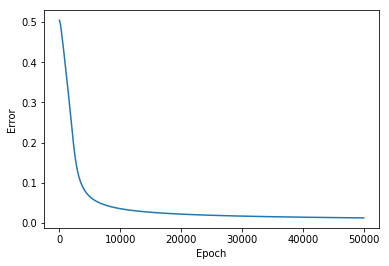

In [4]:
#TODO: Test the class with the XOR data
neural_network = NeuralNetwork(n_inputs = 2, n_h_layers = 1, n_neurons = 5, n_outputs = 2, alpha =0.1)
errors = neural_network.train(XOR_inputs,classes_one_hot_labels,50000,10000)

print("Prediction: ")
print("\nPrediction: \n",neural_network.predict(XOR_inputs)[0])


f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

#### Multiple classes

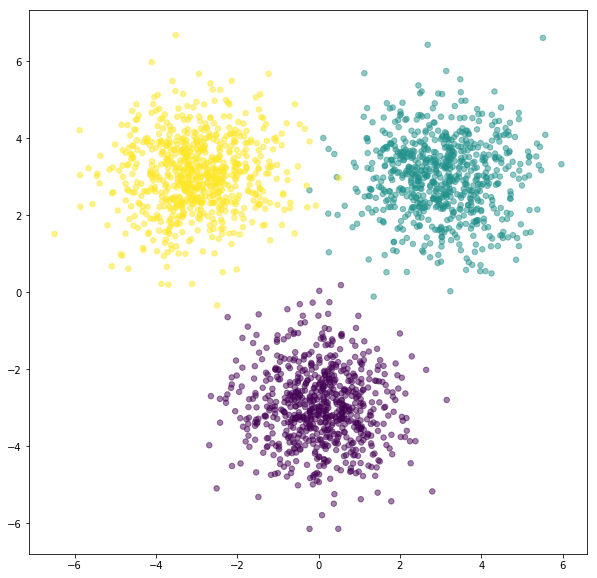

In [5]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

Error: 0.5329524252210116
Error: 0.01889469561735393
Error: 0.013277369241084505
Error: 0.010836964407836772
Error: 0.009361958564998059
Error: 0.008338947291131837
Error: 0.007578611623114258
Error: 0.00698917733336251
Error: 0.006517987442563712
Error: 0.006131980107324288

 Prediction:
 [[0.00127773 0.00585045 0.99287182]]


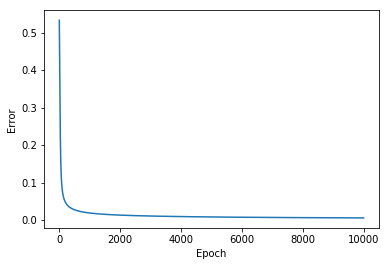

In [6]:
#TODO: Test the class with the multiple classes data
neural_network = NeuralNetwork(n_inputs = 2, n_h_layers = 1, n_neurons = 3, n_outputs = 3, alpha = 0.001)

errors = neural_network.train(feature_set,one_hot_labels,10000,1000)

test = np.array([[-2,2]])

print("\n Prediction:\n",neural_network.predict(test)[0])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

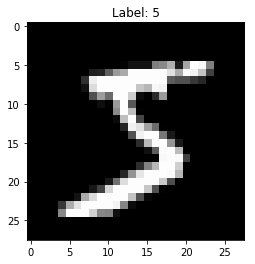

In [7]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [8]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
digits_one_hot_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)


Error: 0.1738763565265212
Error: 0.1374389436428123
Error: 0.10474227744335723
Error: 0.08420814300494261
Error: 0.07191111242432137
Error: 0.06405700591763887
Error: 0.058554624576158065
Error: 0.05423727099685949
Error: 0.05067654631993638
Error: 0.04765891998326607


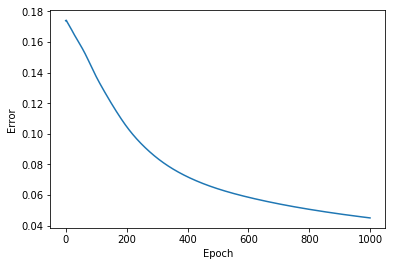

In [9]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.
neural_network = NeuralNetwork(n_inputs = 784, n_h_layers = 2, n_neurons = 64, n_outputs = 10, alpha =  0.0005)
errors = neural_network.train(train_images[0:5000],digits_one_hot_labels[0:5000],1000,100)

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)








In [10]:
predictions = neural_network.predict(test_images[0:1000] )
digits_level3 = predictions[0]
# create one hot encoding on the test data
one_hot_test_labels = to_categorical(test_labels[0:1000])

np.set_printoptions(precision=3, suppress= True)

# turn predictions to one hot encoding labels
predictions = np.copy(digits_level3)
predictions[predictions > 0.5] = 1
predictions[predictions < 0.5] = 0



f, plots2 = plt.subplots((len(error_predictions)+3-1)//3, 3, figsize=(20,10))
plots2 = [plot for sublist in plots2 for plot in sublist]

for (index, pred, label),  plot in zip(error_predictions, plots2):
    plot.imshow(test_images[index].reshape(28,28), cmap="gray")



NameError: name 'error_predictions' is not defined

After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**
I think that the misclassified images were due to the characteristics they have, which are very similar to the characteristics of other numbers.
2. **What could you try doing to improve the classification accuracy?**
To improve the accuracy, I could use a different activation function and execute more epocs of the algorithm.
